> * Utilizing Linear Regression, Support Vector Regression, Adaboost and Random Forest algorithms to forecast calorie expenditure.
> * Conducting Exploratory Data Analysis for dataset visualization. Employing label encoding for categorical columns. 
> * Projecting calorie burn predictions on the test dataset

Importing Dependencies

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
cal_df = pd.read_csv("C:\\Users\\nikit\\Downloads\\exercise.csv")
exercise_df = pd.read_csv("C:\\Users\\nikit\\Downloads\\calories.csv")

In [3]:
cal_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
exercise_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
master_df = pd.merge(cal_df, exercise_df, on='User_ID')
master_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
master_df.shape

(15000, 9)

In [7]:
print("Duplicated values: ", master_df.duplicated().sum())
print("Missing values:\n",master_df.isnull().sum())

Duplicated values:  0
Missing values:
 User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [8]:
#User ID column not required
master_df.drop(columns = ['User_ID'], inplace = True)

# Exploratory Data Analysis

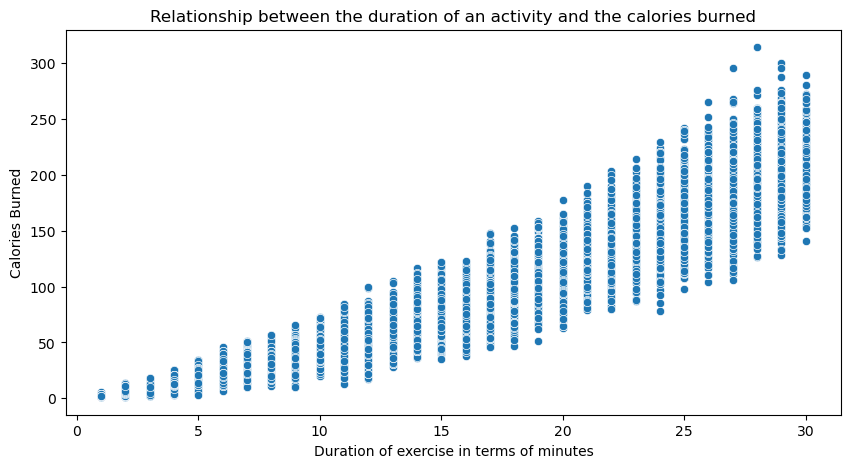

In [9]:
#A scatter plot with Calories on the y-axis and Duration on the x-axis. 
#This can help us understand the relationship between the duration of an activity and the calories burned.
plt.figure(figsize=(10,5))
sns.scatterplot(data = master_df, y = 'Calories', x = 'Duration')
plt.xlabel("Duration of exercise in terms of minutes")
plt.ylabel("Calories Burned")
plt.title("Relationship between the duration of an activity and the calories burned")
plt.show()

**It's clearly observable that as the duration increases, there's a noticeable rise in calories burned, indicating a robust and positive correlation.**

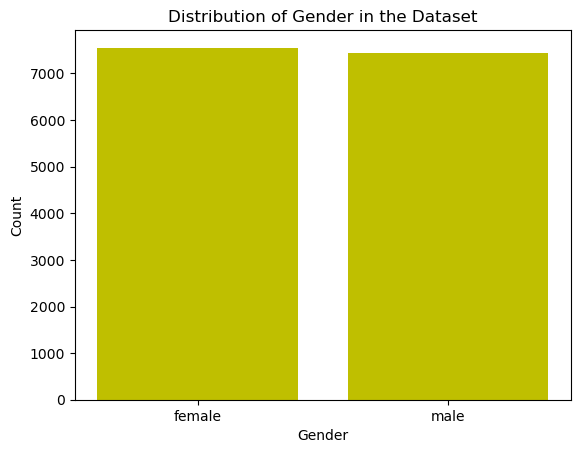

In [10]:
#a bar plot to show the distribution of Gender in your dataset. 
#This give us an overview of how many data points you have for each gender.
gender_counts = master_df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color = 'y')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender in the Dataset")
plt.show()

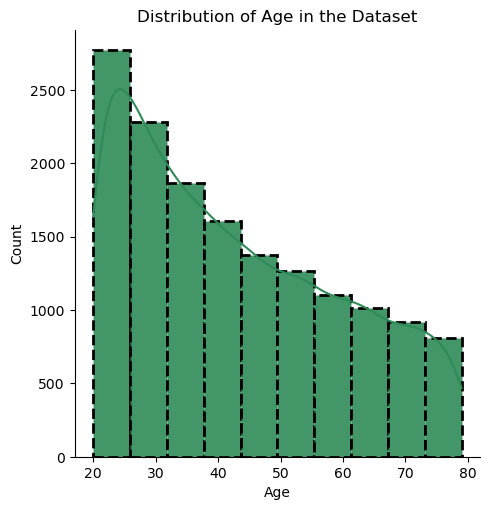

In [11]:
#a histogram to visualize the distribution of Age. 
#This will help to understand the age distribution of your dataset.
age_counts = master_df['Age'].value_counts()

sns.displot(master_df['Age'], bins=10, kde = True, color = 'seagreen',edgecolor='k',linewidth=2,linestyle='--',
             alpha=.9,hue_norm=None )
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age in the Dataset")
plt.show()

Correlation heatmap to visualize the correlations between numeric variables (Calories, Age, Height, Weight, Duration, Heart_Rate, Body_Temp). 
*  Ths will give us insights into which variables are most strongly correlated with each other.
*  Selecting only the numeric columns for correlation

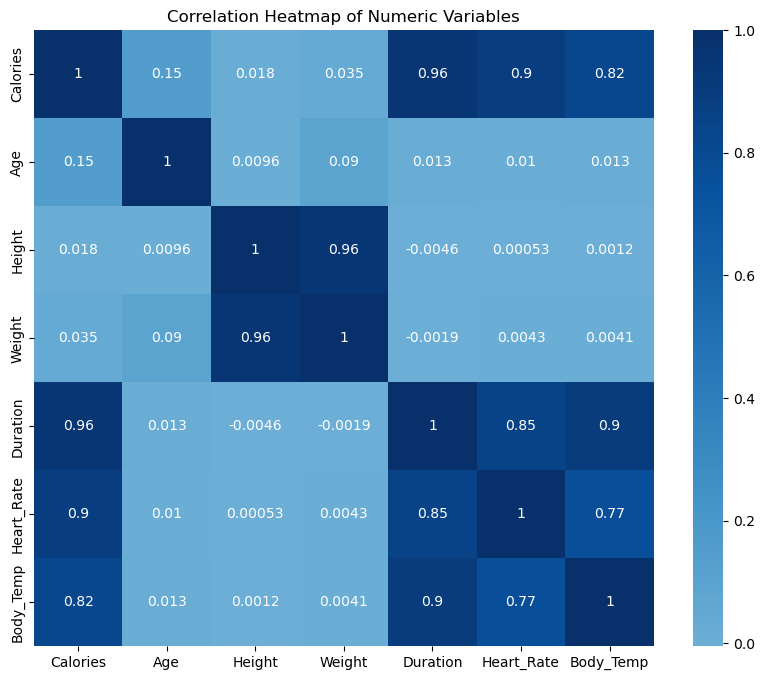

In [12]:
numeric_columns = ["Calories", "Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp"]
corr_df = master_df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap="Blues", center=0)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

**Calories and Duration indicate that longer durations of activity lead to higher calorie burn which eventually increases
Heart Rate and Body Temperature**

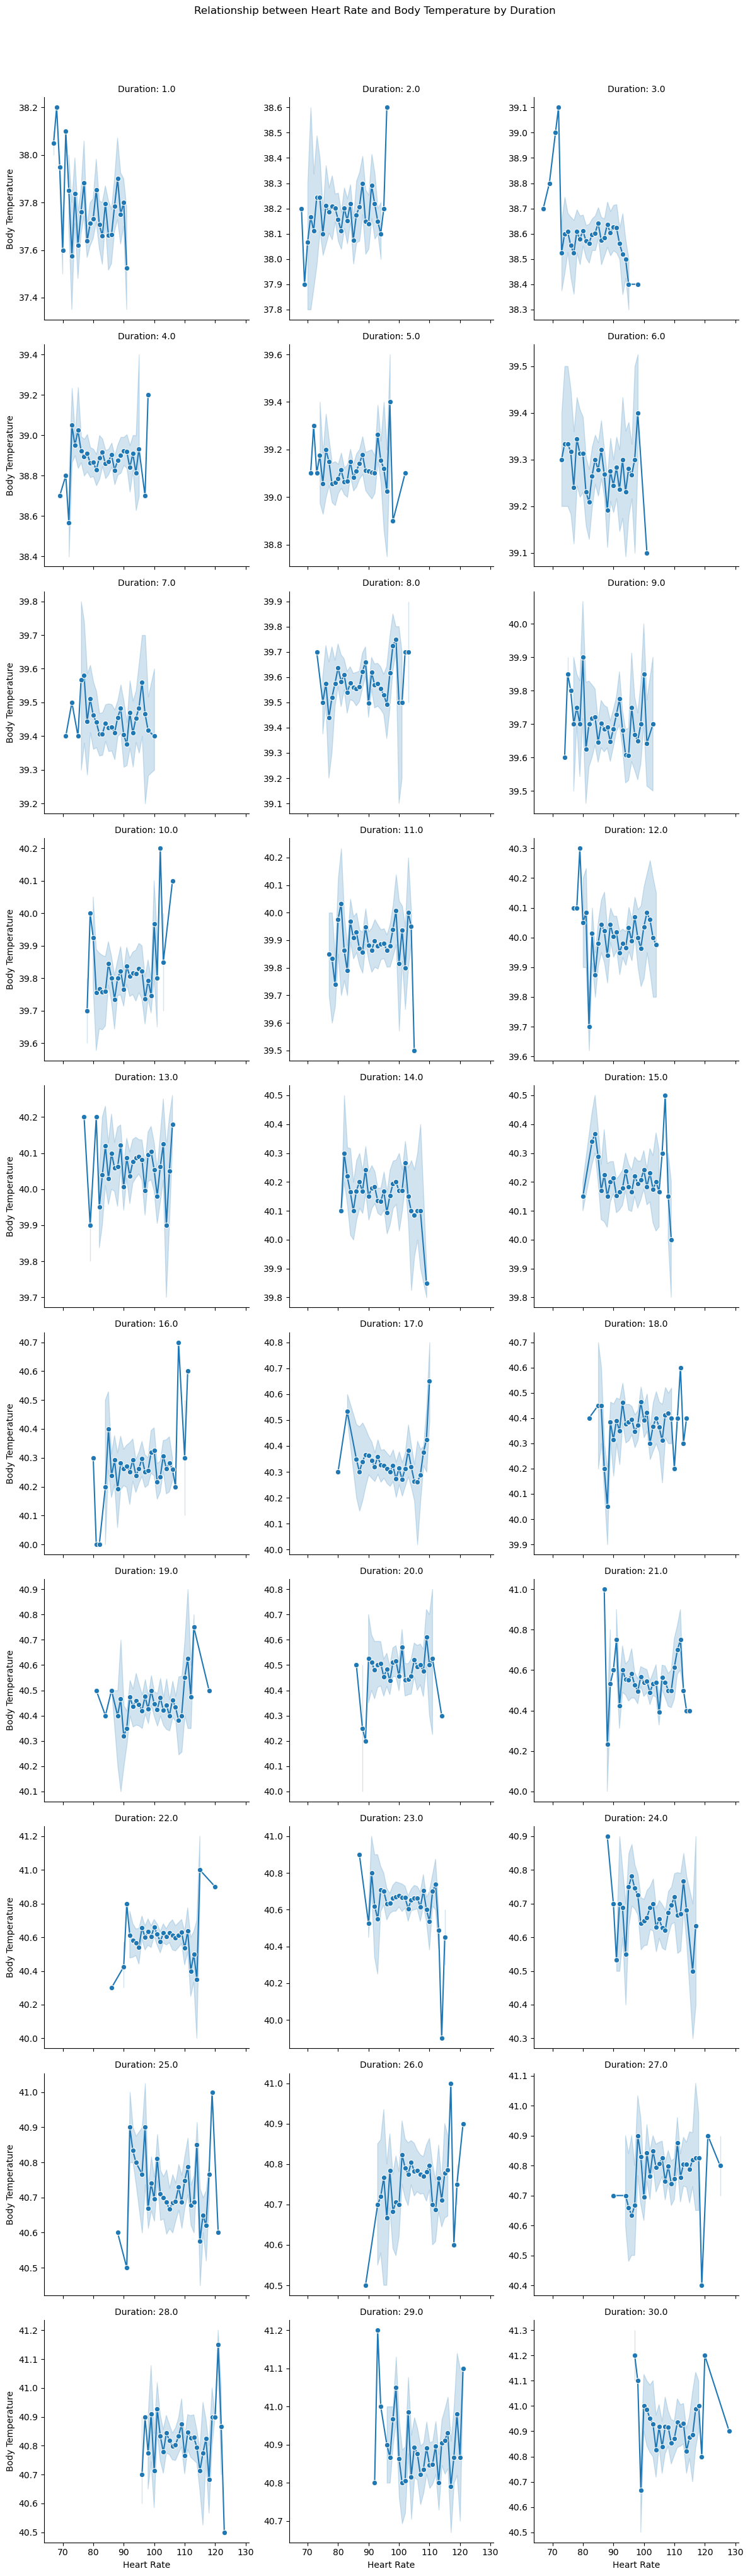

In [13]:
g = sns.FacetGrid(master_df, col='Duration', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'Heart_Rate', 'Body_Temp', marker='o')

g.set_titles(col_template="Duration: {col_name}")
g.set_axis_labels('Heart Rate', 'Body Temperature')
g.fig.suptitle('Relationship between Heart Rate and Body Temperature by Duration', y=1.02)
plt.tight_layout()
plt.show()

**Duration of an Exercise is directly proportional to Heart Rate and Body Temperature of an individual**

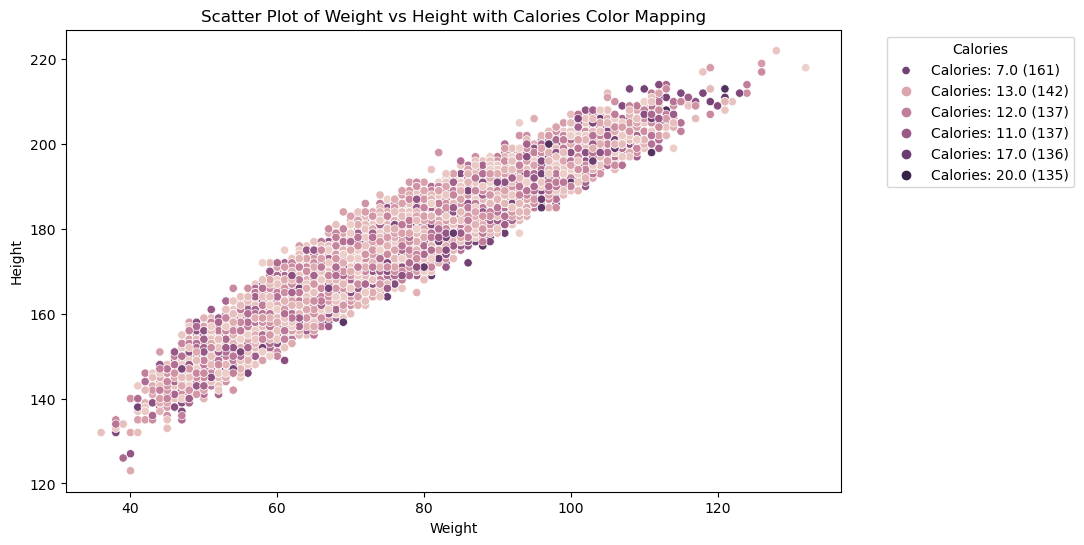

In [14]:
import matplotlib.patches as mpatches
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data = master_df,x = 'Weight',y ='Height', hue = 'Calories')

calorie_counts = master_df['Calories'].value_counts().to_dict()

# Create a pie chart legend with labels
labels = [f'Calories: {cal} ({count})' for cal, count in calorie_counts.items()]

# Place the legend outside the plot
legend = plt.legend(labels, title='Calories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Scatter Plot of Weight vs Height with Calories Color Mapping')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
master_df['Sex'] = label_enc.fit_transform(master_df['Gender'])
master_df.drop(columns=['Gender'], inplace = True)
master_df.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Sex
0,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,27,154.0,58.0,10.0,81.0,39.8,35.0,0


In [16]:
master_df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Sex
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533,0.496467
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978,0.500004
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000,0.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000,0.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000,0.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000,1.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000,1.000000


In [17]:
from sklearn.model_selection import train_test_split
X = master_df.drop(['Calories'], axis = 1)
y = master_df['Calories']
print(X.shape)
print(y.shape)

(15000, 7)
(15000,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

print('Test data R2_Score ',r2_score(y_test,y_pred))

Mean Squared Error: 131.995745750817
Root Mean Squared Error: 11.48894014915288
Test data R2_Score  0.9672937151257295


# Support Vector Regressor - SVR

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(kernel='rbf')  
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print('Test data R2_Score ',r2_score(y_test,y_pred))

Mean Squared Error: 29.580225360710216
Test data R2_Score  0.9926705268280472


# Balancing the Imbalance Data

In [22]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
print("Class distribution before oversampling:", Counter(y))
class_distribution = Counter(y)

Class distribution before oversampling: Counter({7.0: 161, 13.0: 142, 11.0: 137, 12.0: 137, 17.0: 136, 20.0: 135, 8.0: 134, 9.0: 131, 28.0: 121, 4.0: 120, 42.0: 120, 10.0: 119, 14.0: 119, 22.0: 118, 26.0: 116, 21.0: 116, 23.0: 113, 15.0: 111, 44.0: 110, 60.0: 108, 24.0: 107, 34.0: 107, 19.0: 106, 29.0: 105, 30.0: 105, 25.0: 104, 16.0: 104, 6.0: 103, 18.0: 103, 31.0: 100, 54.0: 100, 48.0: 98, 62.0: 97, 43.0: 95, 27.0: 95, 36.0: 95, 37.0: 94, 57.0: 94, 38.0: 94, 47.0: 94, 3.0: 92, 35.0: 91, 32.0: 91, 52.0: 91, 55.0: 91, 49.0: 90, 65.0: 90, 53.0: 90, 41.0: 89, 91.0: 86, 70.0: 85, 51.0: 84, 104.0: 83, 5.0: 82, 45.0: 82, 67.0: 82, 40.0: 82, 66.0: 81, 72.0: 81, 74.0: 81, 39.0: 81, 68.0: 81, 110.0: 80, 69.0: 79, 56.0: 79, 63.0: 79, 33.0: 79, 58.0: 78, 61.0: 78, 59.0: 77, 64.0: 77, 81.0: 77, 71.0: 76, 90.0: 74, 76.0: 74, 88.0: 73, 105.0: 73, 106.0: 73, 50.0: 72, 120.0: 72, 111.0: 72, 156.0: 72, 73.0: 72, 80.0: 71, 113.0: 71, 108.0: 71, 84.0: 71, 103.0: 70, 78.0: 70, 46.0: 70, 95.0: 70, 92.0: 6

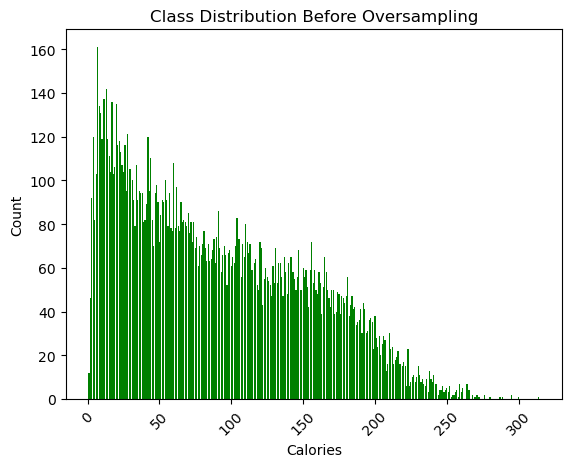

In [23]:
labels = class_distribution.keys()
counts = class_distribution.values()

# Create a bar graph
plt.bar(labels, counts, color = 'g')

plt.xlabel("Calories")
plt.ylabel("Count")
plt.title("Class Distribution Before Oversampling")

plt.xticks(rotation=45)
plt.show()

In [24]:
oversampler = RandomOverSampler(random_state=42)

In [25]:
X_resampled, y_resampled = oversampler.fit_resample(X, y)
print("Class distribution after oversampling:", Counter(y_resampled))
resampled_class_distribution = Counter(y_resampled)

Class distribution after oversampling: Counter({231.0: 161, 66.0: 161, 26.0: 161, 71.0: 161, 35.0: 161, 123.0: 161, 112.0: 161, 143.0: 161, 134.0: 161, 72.0: 161, 3.0: 161, 92.0: 161, 58.0: 161, 88.0: 161, 7.0: 161, 170.0: 161, 11.0: 161, 43.0: 161, 15.0: 161, 74.0: 161, 29.0: 161, 32.0: 161, 10.0: 161, 155.0: 161, 24.0: 161, 12.0: 161, 195.0: 161, 5.0: 161, 69.0: 161, 136.0: 161, 80.0: 161, 107.0: 161, 200.0: 161, 56.0: 161, 50.0: 161, 100.0: 161, 4.0: 161, 70.0: 161, 127.0: 161, 197.0: 161, 113.0: 161, 82.0: 161, 141.0: 161, 30.0: 161, 37.0: 161, 147.0: 161, 8.0: 161, 159.0: 161, 93.0: 161, 173.0: 161, 89.0: 161, 31.0: 161, 94.0: 161, 49.0: 161, 54.0: 161, 117.0: 161, 99.0: 161, 45.0: 161, 166.0: 161, 202.0: 161, 199.0: 161, 25.0: 161, 23.0: 161, 6.0: 161, 188.0: 161, 103.0: 161, 128.0: 161, 130.0: 161, 27.0: 161, 185.0: 161, 57.0: 161, 65.0: 161, 91.0: 161, 120.0: 161, 39.0: 161, 77.0: 161, 42.0: 161, 41.0: 161, 59.0: 161, 179.0: 161, 13.0: 161, 180.0: 161, 101.0: 161, 150.0: 161, 2

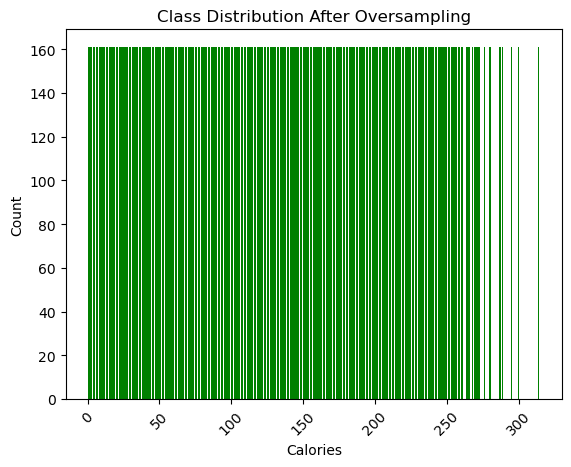

In [26]:
labels = resampled_class_distribution.keys()
counts = resampled_class_distribution.values()

# Create a bar graph
plt.bar(labels, counts, color = 'g')

plt.xlabel("Calories")
plt.ylabel("Count")
plt.title("Class Distribution After Oversampling")

plt.xticks(rotation=45)
plt.show()

Applying ML Algorithms on Resampled data

# Support Vector Regressor

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(kernel='rbf')  
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svr = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
print("Support Vector Regressor Metrics:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print('R2_Score ',r2_score(y_test,y_pred_svr))

Support Vector Regressor Metrics:
Mean Squared Error: 29.580225360710216
Root Mean Squared Error: 5.4387705743771
R2_Score  0.9926705268280472


In [28]:
np.transpose(y_pred_svr)
svr_df=pd.DataFrame(y_pred_svr)
result = y_test.to_frame()
result = result.reset_index(drop=True)
result_svr = result.sort_index()
y_both = pd.concat([svr_df, result_svr], axis=1)
y_both.columns = ['Predicted calories', 'Original calories']
print(y_both)

      Predicted calories  Original calories
0             172.823525              173.0
1             179.158199              189.0
2              53.316766               53.0
3             164.282782              161.0
4             206.675136              226.0
...                  ...                ...
2995          186.327666              186.0
2996           53.882155               53.0
2997          119.714138              120.0
2998           20.950867               20.0
2999          198.119892              214.0

[3000 rows x 2 columns]


# Linear Regression

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred_lin_reg = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lin_reg)
print("Linear Regresssion Metrics:")
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

print('R2_Score ',r2_score(y_test,y_pred_lin_reg))

Linear Regresssion Metrics:
Mean Squared Error: 131.995745750817
Root Mean Squared Error: 11.48894014915288
R2_Score  0.9672937151257295


In [30]:
np.transpose(y_pred_lin_reg)
lin_reg_df=pd.DataFrame(y_pred_lin_reg)
result = y_test.to_frame()
result = result.reset_index(drop=True)
result_lin_reg = result.sort_index()
y_both = pd.concat([lin_reg_df, result_lin_reg], axis=1)
y_both.columns = ['Predicted calories', 'Original calories']
print(y_both)

      Predicted calories  Original calories
0             170.676460              173.0
1             192.088578              189.0
2              56.147964               53.0
3             155.476415              161.0
4             212.450667              226.0
...                  ...                ...
2995          185.161209              186.0
2996           61.115451               53.0
2997          129.665701              120.0
2998            2.415278               20.0
2999          191.990817              214.0

[3000 rows x 2 columns]


# Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics for Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Regressor Metrics:")
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R2 Score:", r2_rf)


Random Forest Regressor Metrics:
Mean Squared Error: 7.198012433333335
Root Mean Squared Error: 2.6829111862552093
R2 Score: 0.998216455812011


In [32]:
np.transpose(y_pred_rf)
rf_df=pd.DataFrame(y_pred_rf)
result = y_test.to_frame()
result = result.reset_index(drop=True)
result_rf = result.sort_index()
y_both = pd.concat([rf_df, result_rf], axis=1)
y_both.columns = ['Predicted calories', 'Original calories']
print(y_both)

      Predicted calories  Original calories
0                 170.27              173.0
1                 192.17              189.0
2                  52.93               53.0
3                 159.87              161.0
4                 220.38              226.0
...                  ...                ...
2995              184.63              186.0
2996               53.57               53.0
2997              120.48              120.0
2998               19.79               20.0
2999              215.28              214.0

[3000 rows x 2 columns]


 # Adaboost

In [33]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_model = AdaBoostRegressor()
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

# Calculate metrics for AdaBoostRegressor
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = np.sqrt(mse_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)
print("AdaBoostRegressor Metrics:")
print("Mean Squared Error:", mse_adaboost)
print("Root Mean Squared Error:", rmse_adaboost)
print("R2 Score:", r2_adaboost)

AdaBoostRegressor Metrics:
Mean Squared Error: 139.8397564547467
Root Mean Squared Error: 11.825386101719753
R2 Score: 0.9653501036314328


In [34]:
np.transpose(y_pred_adaboost)
adaboost_df=pd.DataFrame(y_pred_adaboost)
result = y_test.to_frame()
result = result.reset_index(drop=True)
result_adaboost = result.sort_index()
y_both = pd.concat([adaboost_df, result_adaboost], axis=1)
y_both.columns = ['Predicted calories', 'Original calories']
print(y_both)

      Predicted calories  Original calories
0             180.841503              173.0
1             203.372764              189.0
2              49.457249               53.0
3             170.043727              161.0
4             235.372685              226.0
...                  ...                ...
2995          194.161808              186.0
2996           46.687914               53.0
2997          126.670543              120.0
2998           26.801242               20.0
2999          219.796472              214.0

[3000 rows x 2 columns]


In [35]:
master_prediction = pd.concat([lin_reg_df, svr_df, rf_df, adaboost_df, result_adaboost], axis = 1)
master_prediction.columns = ['Linear Regression Prediction', 'Support Vector Regressor Prediction','Random Forest Regressor Prediction',
                             'Adaboost Regressor Prediction', 'Original calories']
master_prediction.head(20)

,Linear Regression Prediction,Support Vector Regressor Prediction,Random Forest Regressor Prediction,Adaboost Regressor Prediction,Original calories
0,170.676460,172.823525,170.27,180.841503,173.0
1,192.088578,179.158199,192.17,203.372764,189.0
2,56.147964,53.316766,52.93,49.457249,53.0
3,155.476415,164.282782,159.87,170.043727,161.0
4,212.450667,206.675136,220.38,235.372685,226.0
5,184.531237,173.339668,178.38,178.281509,179.0
6,94.301887,99.206844,97.32,81.600196,98.0
7,49.978594,44.291362,45.53,40.119543,44.0
8,82.067060,77.912929,80.33,79.614458,79.0
9,56.582915,58.349351,58.98,58.011834,59.0


> Considering the evaluation metrics :

> The Random Forest Regressor demonstrates the lowest values for both Mean Squared Error and Root Mean Squared Error, indicating its potential for delivering more accurate predictions compared to the other algorithms.

> Furthermore, the Random Forest Regressor achieves the highest R2 Score, implying a significant ability to elucidate the variance within the dataset.

> While the Support Vector Regressor and AdaBoost Regressor exhibit favorable performance, the Random Forest Regressor emerges as the standout choice in this context. 